# **Actividad Fundamental N.º 6 – Implementación de un Modelo Supervisado en Python**

## **Instalación de las librerias y la base de datos**

In [ ]:
#   Se importan las librerias y funciones necesarias para normalizar la base de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #   Esta librería sirve para visualizar de manera gráfica la regresión lineal
import seaborn as sb   #   Esta librería sirve para poder visualizar la correlación de los datos

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#   Se lee el archivo .csv
datos = pd.read_csv('insurance.csv')

print("... Cargando Base de Datos ...")

... Cargando Base de Datos ...


### **--- Revisión de la base de datos ---**

In [50]:
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## **Conversión de columnas categóricas a numéricas**
Debido a que las columnas "sex", "smoker" y "region" son categóricas, se necesita utilzar el método de One-hot-encoding para generar columnas numericas que se puedan normalizar.

Esto se repite por cada una de las 3 columnas categóricas

In [52]:
#   Utilizamos la función "get_dummies" de la librería "pandas" para generar las columnas de manera fácil.
s_dummies = pd.get_dummies(datos['sex']).astype(int)
sm_dummies = pd.get_dummies(datos['smoker']).astype(int)
r_dummies = pd.get_dummies(datos['region']).astype(int)

print("... Generando Dummies ...\n")

#   Solo se tienen que eliminar las columnas pasadas e insertar las nuevas.
ndatos = datos.drop(["sex"], axis=1)
ndatos = ndatos.join(s_dummies)

ndatos = ndatos.drop(["smoker"], axis=1)
ndatos = ndatos.join(sm_dummies)

ndatos = ndatos.drop(["region"], axis=1)
ndatos = ndatos.join(r_dummies)

print("... Insertando Dummies ...")

ndatos.head() # Se revisa la nueva base de datos para verificar que todo está correcto.

... Generando Dummies ...

... Insertando Dummies ...


,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


## **Normalización de la Base de Datos**

In [53]:
#   Se utiliza la función MinMaxScaler, que se encarga de hacer todas las funciones y procesos que se necesitan para normalizar los datos y dejarlas en un rango entre 0 y 1
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(ndatos), columns=ndatos.columns)

print("... Normalizando Base de Datos ...")

... Normalizando Base de Datos ...


### **--- Revisión de la base de datos normalizada ---**

In [54]:
df_normalizado.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [55]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   float64
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   float64
 3   charges    1338 non-null   float64
 4   female     1338 non-null   float64
 5   male       1338 non-null   float64
 6   no         1338 non-null   float64
 7   yes        1338 non-null   float64
 8   northeast  1338 non-null   float64
 9   northwest  1338 non-null   float64
 10  southeast  1338 non-null   float64
 11  southwest  1338 non-null   float64
dtypes: float64(12)
memory usage: 125.6 KB


### **Tabla de Correlación**
Se utiliza la función "heatmap" de "seaborn" para esto, donde se puede ver de manera gráfica con colores, las variables que más influyen en los costos médicos.

En este caso nos podemos dar cuenta de que las variables que están directamente relacionadas con los costos son la edad, indice de masa corporal y que fumen.

Se puede entender que estos valores sean los más relacionados porque si estos aumentan, eres más propenso a tener complicaciones en la salud.

<Axes: >

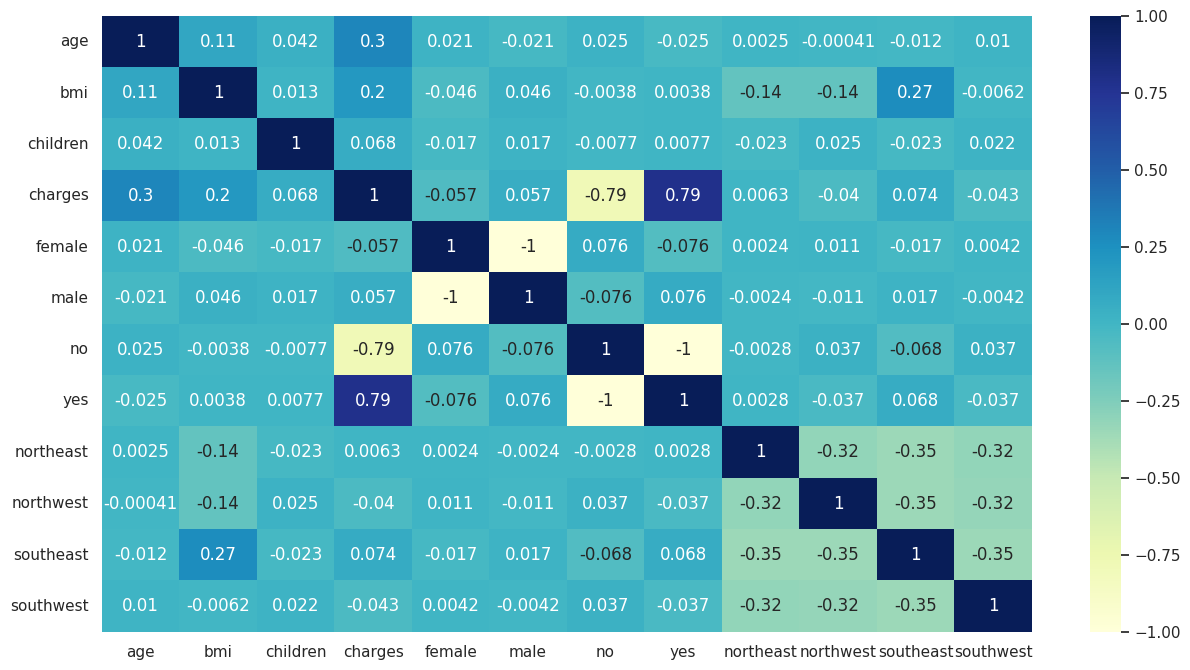

In [56]:
sb.heatmap(df_normalizado.corr(), annot=True, cmap='YlGnBu')

## **Entrenamiento del Modelo**

Para este dataset se dividieron los datos en entrenamiento y prueba 70% - 30%. En este caso, lo que se busca predecir es el costo médico, por lo que la columna "charges" es la variable Y, así mismo, a la variable X le corresponde el resto del dataset.

In [57]:
X = df_normalizado.drop(["charges"], axis = 1)
Y = df_normalizado["charges"]

#   División 70% - 30% para entrenar y prueba
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print("... Entrenando Modelo ...\n")

print(f"Tamaño de Training Set: {len(X_train)}")
print(f"Tamaño de Validation Set: {len(X_val)}")
print(f"Tamaño de Testing Set: {len(X_test)}")

... Entrenando Modelo ...

Tamaño de Training Set: 936
Tamaño de Validation Set: 201
Tamaño de Testing Set: 201


## **Regresión Linear**

In [58]:
#   Se llama a la función "LinearRegression" de "scikit learn" para crear una instancia de regresión lineal
modelo = LinearRegression()

modelo.fit(X_train,Y_train) #   Se especifica al modelo que tiene que utilizar las variables de entrenamiento
print("Modelo entrenado exitosamente :D")

Modelo entrenado exitosamente :D


### **Gráfica de Regresión Lineal**

Se utiliza la librería "matplotlib" para generar una gráfica que compara el costo predicho con el real. Con esta gráfica podemos visualizar la regresión lineal.

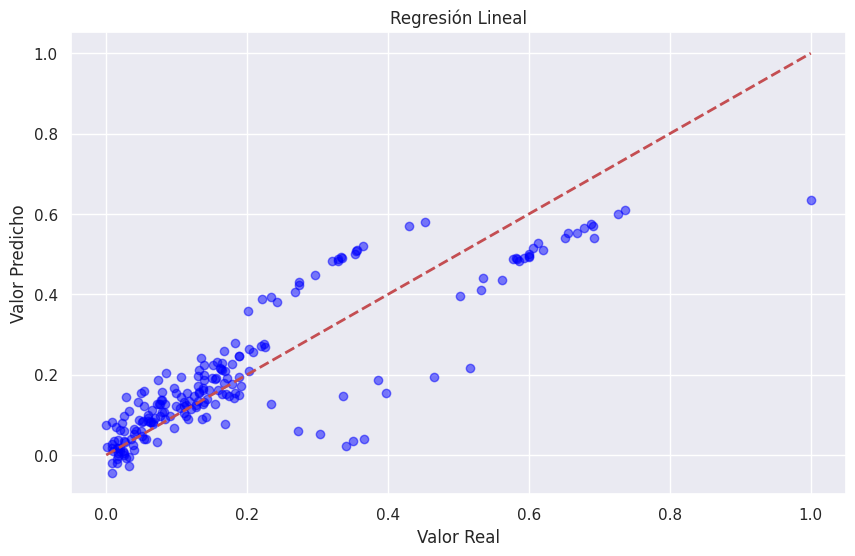

In [62]:
Y_pred = modelo.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Regresión Lineal')
plt.grid(True)
plt.show()

## **Evaluación del Modelo**

Después de entrenar el modelo, necesitamos evaluar su rendimiento. Para los modelos de regresión lineal, utilizamos métricas como el Error Cuadrático Medio (MSE), la Raíz del Error Cuadrático Medio (RMSE) y el Coeficiente de Determinación (R2 Score).


In [63]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("--- Evaluación del Modelo ---")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

--- Evaluación del Modelo ---
MSE: 0.01
RMSE: 0.10
R2 Score: 0.7554


## **Test de Predicciones**

In [61]:
Tilin = [19, 29.77, 0, 0, 1, 1, 0, 0, 1, 0, 0]  #   Aqui solo se ingresan los valores de la persona

#   El resto del código se encarga de generar un dataframe con estos datos, normalizarlo, generar la predicción y desnormalizar la predicción.
input_df = pd.DataFrame([Tilin], ['age', 'bmi', 'children', 'female', 'male', 'no', 'yes', 'northeast', 'northwest', 'southeast', 'southwest'])

feature_scaler = MinMaxScaler()

feature_scaler.fit(ndatos.drop(columns=['charges']))

Tilin_Normalizado = feature_scaler.transform(input_df)

prediccion = modelo.predict(Tilin_Normalizado)

min = datos['charges'].min()
max = datos['charges'].max()

Tilin_Prediccion = prediccion[0] * (max - min) + min

print(f"Los cargos médicos son: {Tilin_Prediccion:.2f}")

Los cargos médicos son: 2595.51


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
